In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_csv('C:/Users/rajapreethi.s/Desktop/Machine Learning/logistic regression/Datasets/train_data.csv',encoding='utf-8')

In [3]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.shape

(54808, 14)

# To check whether the dataset is balanced or not

is_promoted
0    50140
1     4668
dtype: int64

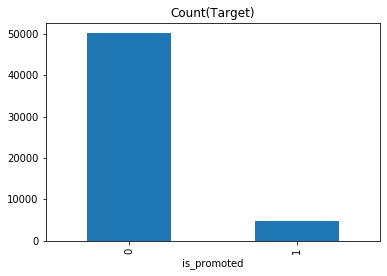

In [5]:
#To check whether the dataset is balanced or not
target_count=df.groupby('is_promoted').size()
target_count.plot(kind='bar',title='Count(Target)')
target_count

# Resampling

In [6]:
# Class count
count_class_0, count_class_1 = df.is_promoted.value_counts()

# Divide by class
df_class_0 = df[df['is_promoted'] == 0]
df_class_1 = df[df['is_promoted'] == 1]

Random under-sampling:
1    4668
0    4668
Name: is_promoted, dtype: int64


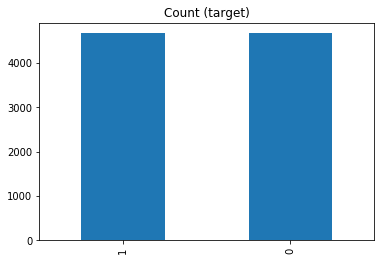

In [7]:
#under sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.is_promoted.value_counts())

df_test_under.is_promoted.value_counts().plot(kind='bar', title='Count (target)');

Random under-sampling:
1    50140
0    50140
Name: is_promoted, dtype: int64


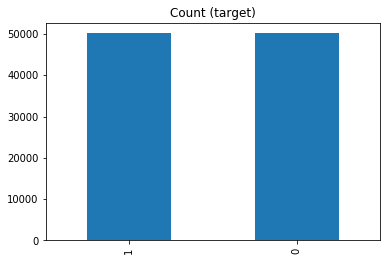

In [8]:
#Over Sampling
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_1_over, df_class_0], axis=0)

print('Random under-sampling:')
print(df_test_over.is_promoted.value_counts())

df_test_over.is_promoted.value_counts().plot(kind='bar', title='Count (target)');

# Checking missing values

In [9]:
df1=df_test_over
null_columns = df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum().sort_values(ascending=False)

previous_year_rating    7400
education               3620
dtype: int64

In [10]:
# filling missing values

df1['education'].fillna(df1['education'].mode()[0], inplace = True)
mean_value=df['previous_year_rating'].mean()
df1['previous_year_rating']=df1['previous_year_rating'].fillna(mean_value)

In [11]:
## Change to categoric gender column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1["gender"] = lb_make.fit_transform(df1["gender"])

In [12]:
df1['education'].value_counts()

Bachelor's          69701
Master's & above    29141
Below Secondary      1438
Name: education, dtype: int64

In [39]:
# Change to categoric education column to numeric
df1.loc[df['education']=="Bachelor's",'education']=0
df1.loc[df['education']=="Master's & above",'education']=1
df1.loc[df['education']=='Below Secondary','education']=2

In [13]:
# Change to categoric education column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1["education"] = lb_make.fit_transform(df1["education"])

#df1[["education", "education_code"]]

In [14]:
df1['department'].value_counts()

Sales & Marketing    28631
Operations           21417
Technology           14544
Procurement          13844
Analytics            10373
Finance               4494
HR                    3733
R&D                   1669
Legal                 1575
Name: department, dtype: int64

In [15]:
# Change to categoric department column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1["department"] = lb_make.fit_transform(df1["department"])
#df1[["department", "department_code"]]

In [16]:
#Multiply both to get total training score
df1['Total_training_score']=df1['no_of_trainings']*df1['avg_training_score']

# Correlation

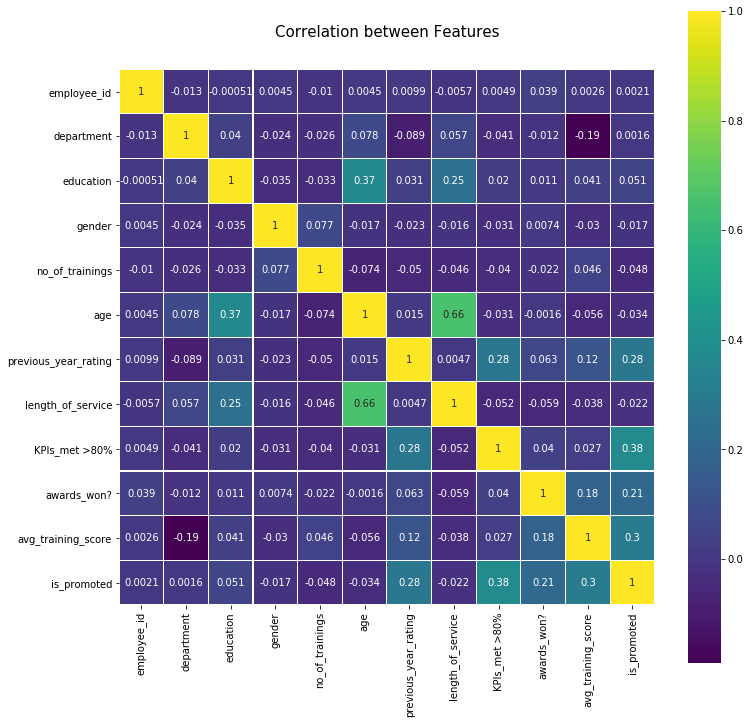

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(df1.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [58]:
#Drop unnecessary columns
#removing age column since age and length of.service is highly correlated'
drop_elements = ['region','recruitment_channel','no_of_trainings','age','avg_training_score']
df1 = df1.drop(drop_elements, axis=1)

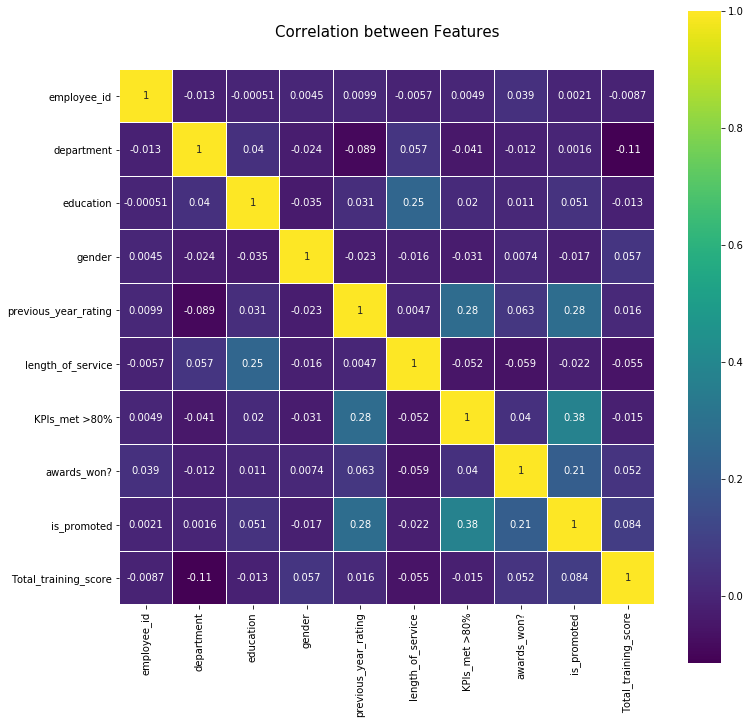

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(df1.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

# Feature Selection

C:\Users\rajapreethi.s\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature: 0, Score: 0.09476
Feature: 1, Score: 0.02109
Feature: 2, Score: 0.01849
Feature: 3, Score: 0.11805
Feature: 4, Score: 0.15990
Feature: 5, Score: 0.15694
Feature: 6, Score: 0.03931
Feature: 7, Score: 0.39146


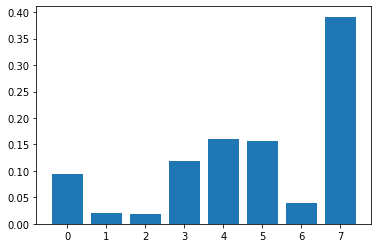

In [50]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
x=df1[['department','education','gender','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','Total_training_score']]
y=df1[['is_promoted']]
# define the model'
model = RandomForestClassifier(random_state=10)
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [51]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(x,y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

C:\Users\rajapreethi.s\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rajapreethi.s\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[False False False  True False  True  True False]
[3 2 4 1 6 1 1 5]


# EDA FOR TEST DATA

In [17]:

df_test = pd.read_csv('C:/Users/rajapreethi.s/Desktop/Machine Learning/logistic regression/Datasets/test_data.csv',encoding='utf-8')


In [18]:
#checking missing value
null_columns = df_test.columns[df_test.isnull().any()]
df_test[null_columns].isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
dtype: int64

In [19]:
# filling missing values

df_test['education'].fillna(df_test['education'].mode()[0], inplace = True)
mean_value=df_test['previous_year_rating'].mean()
df_test['previous_year_rating']=df_test['previous_year_rating'].fillna(mean_value)

In [20]:
## Change to categoric gender column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_test["gender"] = lb_make.fit_transform(df_test["gender"])

In [21]:
# Change to categoric education column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_test["education"] = lb_make.fit_transform(df_test["education"])
#df_test[["education", "education_code"]]

In [22]:
# Change to categoric department column to numeric
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_test["department"] = lb_make.fit_transform(df_test["department"])
#df_test[["department", "department_code"]]

In [23]:
df_test['Total_training_score']=df_test['no_of_trainings']*df_test['avg_training_score']
#Drop unnecessary columns
#removing age column since age and length of.service is highly correlated'
drop_elements = ['region','recruitment_channel','no_of_trainings','age','avg_training_score']
df_test = df_test.drop(drop_elements, axis=1)

In [24]:
df_test

,employee_id,department,education,gender,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,Total_training_score
0,8724,8,0,1,3.339146,1,1,0,77
1,74430,2,0,0,3.000000,5,0,0,51
2,72255,7,0,1,1.000000,4,0,0,47
3,38562,5,0,0,2.000000,9,0,0,195
4,64486,1,0,1,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...
23485,53478,3,1,1,3.000000,1,0,0,61
23486,25600,8,0,1,3.000000,7,0,0,74
23487,45409,2,0,0,4.000000,4,0,0,50
23488,1186,5,0,1,3.339146,1,0,0,210


# MODEL CLASSIFICATION

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



Selected_features = ['employee_id','department','education','gender','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','Total_training_score']
X = df1[Selected_features]
y = df1['is_promoted']


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\rajapreethi.s\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train/Test split results:
LogisticRegression accuracy is 0.688
LogisticRegression log_loss is 0.612
LogisticRegression auc is 0.725


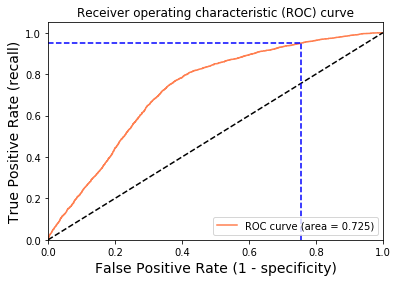

In [31]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [32]:
result=logreg.predict(df_test)

In [45]:
emp_id = df_test['employee_id']
submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': result}) 

In [46]:
submission.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [47]:
# saving the submission file

filename = 'C:/Users/rajapreethi.s/Desktop/Machine Learning/logistic regression/submission1.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  C:/Users/rajapreethi.s/Desktop/Machine Learning/logistic regression/submission1.csv


# MODEL EVALUATION

Text(0.5, 257.44, 'Predicted label')

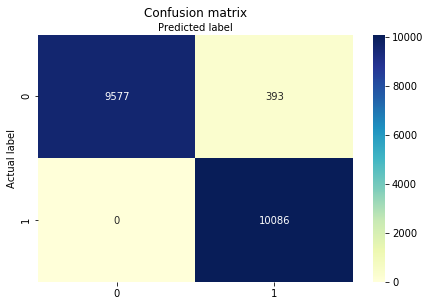

In [41]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9804048663741524
Precision: 0.9624964214142571
Recall: 1.0


In [43]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9970
           1       0.96      1.00      0.98     10086

    accuracy                           0.98     20056
   macro avg       0.98      0.98      0.98     20056
weighted avg       0.98      0.98      0.98     20056



# SAMPLE WORKOUTS

In [52]:

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



Selected_features = ['employee_id','education','department','gender','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']
X = df[Selected_features]
y = df['is_promoted']


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'ratio'

In [74]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
X_test=df_test
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)

print("Training Accuracy :", lgb.score(X_train, y_train))


Training Accuracy : 0.8393498205025928


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print("Training Accuracy :", rfc.score(X_train, y_train))

'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, rfc_pred)
print(cm)

cr = classification_report(y_valid, rfc_pred)
print(cr)

apc = average_precision_score(y_valid, rfc_pred)
print("Average Precision Score :", apc)
'''

Training Accuracy : 1.0


'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, rfc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, rfc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, rfc_pred)\nprint("Average Precision Score :", apc)\n'

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [40]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [76]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
'''
print("Validation Accuracy :", xgb.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, xgb_pred)
print(cm)

cr = classification_report(y_valid, xgb_pred)
print(cr)

apc = average_precision_score(y_valid, xgb_pred)
print("Average Precision Score :", apc)
'''

Training Accuracy : 0.889671420023933


'\nprint("Validation Accuracy :", xgb.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, xgb_pred)\nprint(cm)\n\ncr = classification_report(y_valid, xgb_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, xgb_pred)\nprint("Average Precision Score :", apc)\n'

In [80]:
pip install --user xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

etc_pred = etc.predict(X_test)

print("Training Accuracy :", etc.score(X_train, y_train))
'''
print("Validation Accuracy :", etc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, etc_pred)
print(cm)

cr = classification_report(y_valid, etc_pred)
print(cr)

apc = average_precision_score(y_valid, etc_pred)
print("Average Precision Score :", apc)
'''

Training Accuracy : 1.0


'\nprint("Validation Accuracy :", etc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, etc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, etc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, etc_pred)\nprint("Average Precision Score :", apc)\n'

In [78]:

from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(X_train, y_train)

cbc_pred = cbc.predict(X_test)

print("Training Accuracy :", rfc.score(X_train, y_train))
'''
print("Validation Accuracy :", rfc.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, cbc_pred)
print(cm)

cr = classification_report(y_valid, cbc_pred)
print(cr)

apc = average_precision_score(y_valid, cbc_pred)
print("Average Precision Score :", apc)
'''

0:	learn: 0.6912301	total: 14.6ms	remaining: 14.6s
1:	learn: 0.6889956	total: 29ms	remaining: 14.5s
2:	learn: 0.6867018	total: 42ms	remaining: 14s
3:	learn: 0.6847565	total: 55ms	remaining: 13.7s
4:	learn: 0.6829841	total: 67.7ms	remaining: 13.5s
5:	learn: 0.6807486	total: 80.7ms	remaining: 13.4s
6:	learn: 0.6782227	total: 93.7ms	remaining: 13.3s
7:	learn: 0.6765046	total: 107ms	remaining: 13.2s
8:	learn: 0.6745266	total: 120ms	remaining: 13.2s
9:	learn: 0.6728635	total: 132ms	remaining: 13.1s
10:	learn: 0.6712372	total: 145ms	remaining: 13s
11:	learn: 0.6694099	total: 159ms	remaining: 13.1s
12:	learn: 0.6677710	total: 172ms	remaining: 13.1s
13:	learn: 0.6657509	total: 185ms	remaining: 13s
14:	learn: 0.6635709	total: 198ms	remaining: 13s
15:	learn: 0.6620670	total: 215ms	remaining: 13.2s
16:	learn: 0.6601577	total: 229ms	remaining: 13.2s
17:	learn: 0.6586282	total: 248ms	remaining: 13.6s
18:	learn: 0.6569789	total: 261ms	remaining: 13.5s
19:	learn: 0.6554377	total: 274ms	remaining: 13.

'\nprint("Validation Accuracy :", rfc.score(x_valid, y_valid))\n\ncm = confusion_matrix(y_valid, cbc_pred)\nprint(cm)\n\ncr = classification_report(y_valid, cbc_pred)\nprint(cr)\n\napc = average_precision_score(y_valid, cbc_pred)\nprint("Average Precision Score :", apc)\n'

  Using cached catboost-0.23.2-cp37-none-win_amd64.whl (63.6 MB)
  Using cached graphviz-0.14-py2.py3-none-any.whl (18 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=960e37e57263b4f0246628f0296ab128bf23feedead75ce1f73ff9aa8199a7a5
  Stored in directory: c:\users\rajapreethi.s\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [79]:

boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3

'''
apc = average_precision_score(y_valid, boosted_predictions)
print("Average Precision Score :", apc)
'''

'\napc = average_precision_score(y_valid, boosted_predictions)\nprint("Average Precision Score :", apc)\n'